# Python code um das Newtonfraktal zu veranschaulichen

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Wir benutzen das Newtonsverfahren bei unserem komplexen Polynom
### f(z) = z^5−1  
### Welches folgende Nullstellen hat
### $n_1$: 1

### $n_2$: $e^{i\frac{2π}{5}}$

### $n_3$: $e^{i\frac{4π}{5}}$

### $n_4$: $e^{i\frac{6π}{5}}$

### $n_5$: $e^{i\frac{8π}{5}}$

In [2]:
def newton_method(z, max_iter=100, tol=1e-6):
    for i in range(max_iter):
        z_next = z - (z**5 - 1) / (5 * z**4)   # Newton's method
        if abs(z_next - z) < tol:              # Break condition
            return z_next, i
        z = z_next
    return z, max_iter

### Nun brauchen wir noch eine Funktion, die das Newtonsverfahren auf jeden Punkt in der komplexen Ebene anwendet, um unser Fraktal zu erstellen

In [3]:
def newton_fractal(xmin, xmax, ymin, ymax, width, height, max_iter=100, tol=1e-6):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    fractal = np.zeros((height, width, 3))  # Note: height, width to match image coordinates
    
    roots = [
        1,
        np.exp(2j * np.pi / 5),
        np.exp(4j * np.pi / 5),
        np.exp(6j * np.pi / 5),
        np.exp(8j * np.pi / 5)
    ]
    colors = [
        [1, 0, 0],  # Red
        [0, 1, 0],  # Green
        [0, 0, 1],  # Blue
        [1, 1, 0],  # Yellow
        [1, 0, 1]   # Magenta
    ]
    
    for i in range(width):
        for j in range(height):
            zx, zy = x[i], y[j]
            z = complex(zx, zy)
            root, iters = newton_method(z, max_iter, tol)
            
            for k in range(len(roots)):
                if abs(root - roots[k]) < tol:
                    color = colors[k]
                    break
            else:
                color = [0, 0, 0]  # Black for no convergence
            
            fractal[height - j - 1, i] = color  # Flip the y-coordinate
    
    return fractal

### Nun fehlt nur noch die Dimensionierungsgröße und das Plotten

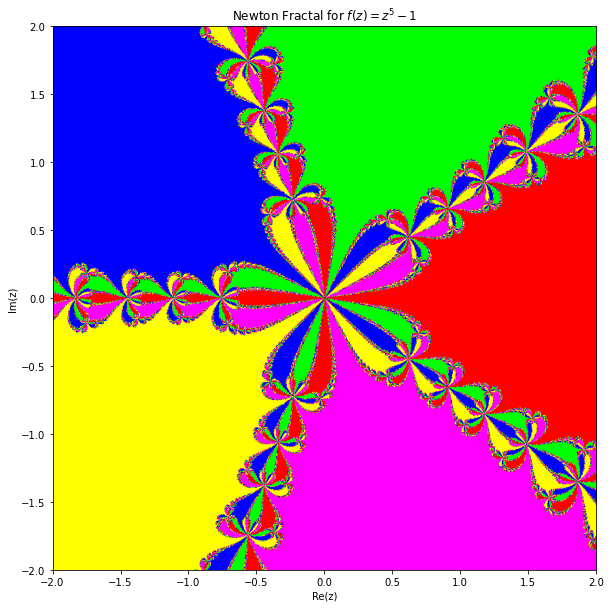

In [4]:
xmin, xmax = -2, 2
ymin, ymax = -2, 2
width, height = 800, 800

fractal = newton_fractal(xmin, xmax, ymin, ymax, width, height)

plt.figure(figsize=(10, 10))
plt.imshow(fractal, extent=(xmin, xmax, ymin, ymax))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Newton Fractal for $f(z) = z^5 - 1$')
plt.show()